# Setting Up Word2vec project
# This Word2vec project is meant to cover word similaritity in Behavioural Interventions study descriptions. A focus on HIV/AIDS

In [2]:
# Import packages
import pandas as pd
import json
import spacy
import requests
import numpy as np
from tqdm import tqdm
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt
import string


In [1]:
# Extract Trial ID codes
trials = "NCT06036238,NCT05882916,NCT05862857,NCT05845619,NCT05842122,NCT05768763,NCT05736588,NCT05634265,NCT05599581,NCT05545449,NCT05467306,NCT05383755,NCT05285670,NCT05219552,NCT05147519,NCT04982250,NCT05007717,NCT04772469,NCT04588883,NCT04550221,NCT04472884,NCT04437667,NCT04432571,NCT03988387,NCT03876483,NCT03875950,NCT03574129,NCT03447210,NCT03435887,NCT03342027,NCT03054051,NCT03049917,NCT03030768,NCT02931422,NCT02928900,NCT02915367,NCT02735642,NCT02726607,NCT02718456,NCT02627365,NCT02527135,NCT02474992,NCT02400671,NCT02338739,NCT02320799,NCT01962220,NCT01947764,NCT01912521,NCT01876199,NCT01850576,NCT01784783,NCT01756469,NCT01645865,NCT01630304,NCT01557998,NCT01571128,NCT01503255,NCT01501864,NCT01157442,NCT01058694,NCT00792519,NCT00273780,NCT00241202,NCT00194545,NCT00146380,NCT05525533,NCT05373095,NCT05374109,NCT05357144,NCT05306938,NCT05271903,NCT05248100,NCT05033002,NCT04863898,NCT04696861,NCT04201353,NCT04071873,NCT03600142,NCT03454373,NCT03098693,NCT02938533,NCT02888288,NCT02714140,NCT03023033,NCT02376348,NCT02281578,NCT02018978,NCT01746758,NCT01693458,NCT00941876,NCT00631384,NCT00248469,NCT00203749,NCT05943548,NCT05917210,NCT05947539,NCT05771519,NCT05688709,NCT05685498,NCT05597865,NCT05600621,NCT05388084,NCT05378607,NCT05307250,NCT05178979,NCT05131165,NCT05124665,NCT05098015,NCT05084716,NCT04946071,NCT04774666,NCT04624061,NCT04528732,NCT04736316,NCT04286282,NCT04122144,NCT04030520,NCT03915899,NCT03928418,NCT03916783,NCT03919695,NCT03878147,NCT03832530,NCT03648931,NCT03583541,NCT03718871,NCT03494777,NCT03484533,NCT03492216,NCT03435497,NCT03386578,NCT03307226,NCT03315962,NCT02964169,NCT02890459,NCT02775357,NCT02729337,NCT02556957,NCT02702895,NCT02545673,NCT02503072,NCT02497456,NCT02438930,NCT02396394,NCT02050763,NCT02038582,NCT01971710,NCT01882998,NCT01802736,NCT01790373,NCT01773642,NCT01640561,NCT01447615,NCT01366690,NCT01144234,NCT00972192,NCT00926003,NCT00889395,NCT00790959,NCT00648232"
modified_string = trials.replace(",", "','")

# Now convert this string into a list by splitting on "','"
string_list = modified_string.split("','")

# Print the list
print(string_list)

['NCT06036238', 'NCT05882916', 'NCT05862857', 'NCT05845619', 'NCT05842122', 'NCT05768763', 'NCT05736588', 'NCT05634265', 'NCT05599581', 'NCT05545449', 'NCT05467306', 'NCT05383755', 'NCT05285670', 'NCT05219552', 'NCT05147519', 'NCT04982250', 'NCT05007717', 'NCT04772469', 'NCT04588883', 'NCT04550221', 'NCT04472884', 'NCT04437667', 'NCT04432571', 'NCT03988387', 'NCT03876483', 'NCT03875950', 'NCT03574129', 'NCT03447210', 'NCT03435887', 'NCT03342027', 'NCT03054051', 'NCT03049917', 'NCT03030768', 'NCT02931422', 'NCT02928900', 'NCT02915367', 'NCT02735642', 'NCT02726607', 'NCT02718456', 'NCT02627365', 'NCT02527135', 'NCT02474992', 'NCT02400671', 'NCT02338739', 'NCT02320799', 'NCT01962220', 'NCT01947764', 'NCT01912521', 'NCT01876199', 'NCT01850576', 'NCT01784783', 'NCT01756469', 'NCT01645865', 'NCT01630304', 'NCT01557998', 'NCT01571128', 'NCT01503255', 'NCT01501864', 'NCT01157442', 'NCT01058694', 'NCT00792519', 'NCT00273780', 'NCT00241202', 'NCT00194545', 'NCT00146380', 'NCT05525533', 'NCT05373

In [3]:
# Extracted Trial ID identifiers 
study_identifiers = string_list

# Initialize an empty list to store the extracted data
all_extracted_data = []

In [4]:
# Accessing Clinical trials.gov API

# Loop through each study identifier and retrieve data
for identifier in study_identifiers:
    url =  f"https://classic.clinicaltrials.gov/api/query/study_fields?expr={identifier}&fields=LeadSponsorName,InterventionDescription,BaselineMeasurePopulationDescription,DesignInterventionModelDescription,InterventionName,PrimaryOutcomeDescription&fmt=JSON"
    
    response = requests.get(url)  
    
    if response.status_code == 200:
        data = json.loads(response.text)
        
        extracted_data = {
            "NCTNumber": identifier,
            "LeadSponsorName": data["StudyFieldsResponse"]["StudyFields"][0]["LeadSponsorName"][0],
            "InterventionDescription": data["StudyFieldsResponse"]["StudyFields"][0]["InterventionDescription"][0] if data["StudyFieldsResponse"]["StudyFields"][0].get("InterventionDescription") else None,
            "BaselineMeasurePopulationDescription": data["StudyFieldsResponse"]["StudyFields"][0]["BaselineMeasurePopulationDescription"][0] if data["StudyFieldsResponse"]["StudyFields"][0].get("BaselineMeasurePopulationDescription") else None,
            "DesignInterventionModelDescription": data["StudyFieldsResponse"]["StudyFields"][0]["DesignInterventionModelDescription"][0] if data["StudyFieldsResponse"]["StudyFields"][0].get("DesignInterventionModelDescription") else None,
            "InterventionName": data["StudyFieldsResponse"]["StudyFields"][0]["InterventionName"][0],
            "PrimaryOutcomeDescription": data["StudyFieldsResponse"]["StudyFields"][0]["PrimaryOutcomeDescription"][0] if data["StudyFieldsResponse"]["StudyFields"][0].get("PrimaryOutcomeDescription") else None,
        }
        all_extracted_data.append(extracted_data)
    else:
        print(f"Failed to retrieve data for {identifier} with status code {response.status_code}")

In [5]:
# Convert it into a Pandas DataFrame for further analysis or manipulation.
df = pd.DataFrame(all_extracted_data)
# # Save the data to a CSV file 
df.to_csv("clinical_trial_data.csv", index=False)

print(df.head())


     NCTNumber                          LeadSponsorName  \
0  NCT06036238  University of California, San Francisco   
1  NCT05882916                            Sue Napierala   
2  NCT05862857  University of California, San Francisco   
3  NCT05845619  University of California, San Francisco   
4  NCT05842122            Fred Hutchinson Cancer Center   

                             InterventionDescription  \
0  The Healthy Living Intervention (HLI) is a bri...   
1  Oral fluid-based HIV self-test kits for second...   
2  Patrons and employees of drinking venues that ...   
3  The pilot intervention will include the follow...   
4  Services delivered: 1) behavioral HIV risk ass...   

  BaselineMeasurePopulationDescription  \
0                                 None   
1                                 None   
2                                 None   
3                                 None   
4                                 None   

                  DesignInterventionModelDescription  \

In [8]:
# Text Analysis on Intervention Description 
# One prepare Data
intervention = df['InterventionDescription']

sentences = ' '.join(intervention.astype(str))

#sentences = intervention
print(sentences)

Oral fluid-based HIV self-test kits for secondary distribution Patrons and employees of drinking venues that are randomized to HIV-focused recruitment will receive a recruitment card offering free HIV testing at the local clinic The pilot intervention will include the following components:

More frequent viral load collection: Participants who enroll in the first 3 months of the pilot study period will be eligible for a 3-month follow-up visit and will have viral load assessed again at that time.
Rapid return of viral load results: Mentor mothers (peer counselors) will be trained to return viral load results to patients. Viral loads will will be processed with GeneXpert point of care technology.
Enhanced viral load counseling: Mentor mothers will reinforce adherence with all patients with undetectable levels via scripted messaging to reward and encourage healthy behavior. For those with any detectable levels, mentor mothers will be trained to provide targeted counseling with scripted m

In [32]:
# create a txt file to save the interventions
with open ('intervention.txt','w', encoding='utf-8') as f:
    f.write (sentences)

In [11]:
# stop words txt file
with open('stopwords.txt', encoding='utf-8') as f:
    stopwords = f.read().replace('\n',' ').split()

In [95]:
with open ('intervention.txt', encoding='utf-8') as f:
    text = f.read().replace('\n','')
    print(text)
    text = text.translate(str.maketrans(string.punctuation, ' ' * len(string.punctuation)))
    text = ''.join([t for t in text if t not in list('0123456789')])
    text = text.replace('”', '').replace('“', '').replace('’', '').lower().split()
    #text = text.lower().split()
    print(text)

text = [w for w in text if w not in stopwords][:20000]
print(len(text))
    


Oral fluid-based HIV self-test kits for secondary distribution Patrons and employees of drinking venues that are randomized to HIV-focused recruitment will receive a recruitment card offering free HIV testing at the local clinic The pilot intervention will include the following components:More frequent viral load collection: Participants who enroll in the first 3 months of the pilot study period will be eligible for a 3-month follow-up visit and will have viral load assessed again at that time.Rapid return of viral load results: Mentor mothers (peer counselors) will be trained to return viral load results to patients. Viral loads will will be processed with GeneXpert point of care technology.Enhanced viral load counseling: Mentor mothers will reinforce adherence with all patients with undetectable levels via scripted messaging to reward and encourage healthy behavior. For those with any detectable levels, mentor mothers will be trained to provide targeted counseling with scripted messa

5909


In [96]:
# Data Preparation
WINDOW_SIZE = 3
NUM_NEGATIVE_SAMPLES = 3

data = [] #  This list will store the training examples. Each training example is a triplet [center_word, context_word/negative_sample, label], 
        #   where label is 1 for positive samples (actual context words) and 0 for negative samples.

#iterate
for idx, center_word in enumerate (text[WINDOW_SIZE-1:-WINDOW_SIZE]):

    # itwerate over the context words around the centre word
    context_words = [context_word for context_word in text[idx:idx+2*WINDOW_SIZE-1] if context_word != center_word]
    for context_word in context_words:

        #get words NOT in the current context as negative samples
        data.append([center_word, context_word, 1])
        negative_samples = np.random.choice([w for w in text[WINDOW_SIZE -1:-1] if w != center_word and w not in context_word])

        for negative_samp in negative_samples:

            #add atraining row
            data.append([center_word, negative_samp, 0])


In [97]:
df1 = pd.DataFrame(columns=['center_word', 'context_word', 'label'], data=data)
words = np.intersect1d(df1.context_word, df1.center_word)
df1 = df1[(df1.center_word.isin(words)) & (df1.context_word.isin(words)).reset_index(drop=True)]

In [98]:
df1

,center_word,context_word,label
0,based,oral,1
6,based,fluid,1
20,based,hiv,1
27,based,kits,1
35,hiv,fluid,1
...,...,...,...
195410,counseling,blood,1
195416,hour,additional,1
195425,hour,counseling,1
195435,hour,blood,1


In [99]:
def sigmoid(v, scale=1):
    return 1/(1 + np.exp(-scale*v))

In [78]:
def update_embeddings(df1, main_embeddings, context_embeddings, learning_rate, debug=False):

    #get differences between main embeddings and corresponding context embeddings
    main_embeddings_center = main_embeddings.loc[df1.center_word].values
    context_embeddings_context = context_embeddings.loc[df1.context_word].values
    diffs = context_embeddings_context - main_embeddings_center

    #get similarities, scores, and errors between main embeddings and corresponding context embeddings
    dot_prods = np.sum(main_embeddings_center * context_embeddings_context, axis=1)
    scores = sigmoid(dot_prods)
    errors = (df1.label - scores).values.reshape(-1,1)

    #calculate updates
    updates = diffs*errors*learning_rate
    updates_df = pd.DataFrame(data=updates)
    updates_df['center_word'] = df1.center_word
    updates_df['context_word'] = df1.context_word
    updates_df_center = updates_df.groupby('center_word').sum()
    updates_df_context = updates_df.groupby('context_word').sum()

    if debug:
        plot_words(debug)

    #apply updates
    main_embeddings += updates_df_center.loc[main_embeddings.index]
    context_embeddings -= updates_df_context.loc[context_embeddings.index]

    #normalize embeddings
    main_embeddings = normalize_data(main_embeddings)
    context_embeddings = normalize_data(context_embeddings)

    #return the updated embeddings
    return main_embeddings, context_embeddings




In [79]:
def normalize_data(data):
    row_norms = np.sqrt((data.values**2).sun(axis=1)).reshape(-1,1)
    return data.divide(row_norms, axis='index')

In [80]:
def plot_words(debug):
    plt.figure(figsize=(8,4))
    
    plt.subplot(1,2,1)
    lim_main_first = main_embeddings.loc[[debug[0]]]
    lim_main_second = main_embeddings.loc[[debug[1]]]
    p1 = plt.scatter(lim_main_first[0], lim_main_first[1], color='r')
    plt.arrow(0,0,float(lim_main_first[0]), float(lim_main_first[1]), head_width=0.01, length_includes_head=True)
    for idx,row in lim_main_first.iterrows():
        plt.text(row[0], row[1], str(idx))
    p2 = plt.scatter(lim_main_second[0], lim_main_second[1], color='r')
    plt.arrow(0,0,float(lim_main_second[0]), float(lim_main_second[1]), head_width=0.01, length_includes_head=True)
    for idx,row in lim_main_second.iterrows():
        plt.text(row[0], row[1], str(idx))
    sim = 1 - cosine(main_embeddings.loc[debug[0]], main_embeddings.loc[debug[1]])
    plt.title('Sim = %s'%round(sim,4), fontsize=20)
    plt.axvline(0, color='k', linestyle='--', alpha=0.5)
    plt.axhline(0, color='k', linestyle='--', alpha=0.5)
    
    t = np.arange(0, 3.14*2+0.1, 0.1)
    plt.plot(np.cos(t), np.sin(t), linewidth=1, color='k', alpha=0.5, linestyle='--')
    
    ###################################
    
    plt.subplot(1,2,2)
    lim_main = main_embeddings.loc[[debug[0]]]
    lim_context = context_embeddings.loc[[debug[1]]]
    p1 = plt.scatter(lim_main[0], lim_main[1], color='r')
    plt.arrow(0,0,float(lim_main[0]), float(lim_main[1]), head_width=0.01, length_includes_head=True)
    for idx,row in lim_main.iterrows():
        plt.text(row[0], row[1], str(idx))
    p2 = plt.scatter(lim_context[0], lim_context[1], color='b')
    plt.arrow(0,0,float(lim_context[0]), float(lim_context[1]), head_width=0.01, length_includes_head=True)
    for idx,row in lim_context.iterrows():
        plt.text(row[0], row[1], str(idx))
    sim = 1 - cosine(main_embeddings.loc[debug[0]], context_embeddings.loc[debug[1]])
    plt.title('Sim = %s'%round(sim,4), fontsize=20)
    plt.axvline(0, color='k', linestyle='--', alpha=0.5)
    plt.axhline(0, color='k', linestyle='--', alpha=0.5)
    
    plt.plot(np.cos(t), np.sin(t), linewidth=1, color='k', alpha=0.5, linestyle='--')
    
    plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_14732\527702025.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  plt.arrow(0,0,float(lim_main_first[0]), float(lim_main_first[1]), head_width=0.01, length_includes_head=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14732\527702025.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  plt.arrow(0,0,float(lim_main_second[0]), float(lim_main_second[1]), head_width=0.01, length_includes_head=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14732\527702025.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  plt.arrow(0,0,float(lim_main[0]), float(lim_main[1]), head_width=0.01, length_includes_head=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_1

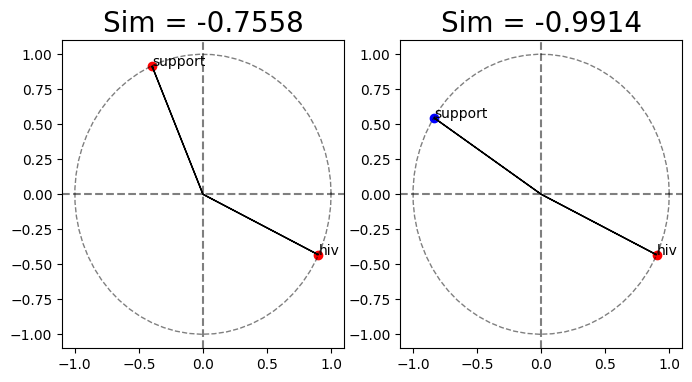

KeyError: "['access', 'accompanying', 'achieve', 'action', 'actionable', 'actors', 'acute', 'adaptive', 'addition', 'additional', 'address', 'adhere', 'adolescent', 'adolescents', 'adult', 'advance', 'advice', 'agyw', 'aids', 'aimed', 'aims', 'alhiv', 'allies', 'analysis', 'answer', 'answering', 'application', 'appointment', 'appointments', 'arm', 'art', 'assess', 'assigned', 'attitudes', 'automated', 'automatically', 'awareness', 'barriers', 'basic', 'basics', 'basis', 'behaviors', 'breastfeeding', 'bring', 'brochures', 'buddy', 'build', 'building', 'capability', 'cards', 'caregiving', 'caring', 'cash', 'challenge', 'challenges', 'challenging', 'change', 'characteristics', 'characterized', 'check', 'child', 'choice', 'choices', 'clinical', 'clinically', 'clinician', 'closely', 'clubs', 'coaching', 'cognitive', 'collect', 'communicate', 'communication', 'companionship', 'component', 'composed', 'concern', 'concerns', 'conducted', 'consist', 'consistent', 'consistently', 'consists', 'consultant', 'consultation', 'contact', 'content', 'continuation', 'contraception', 'coping', 'correct', 'counselor', 'ctml', 'current', 'customizable', 'daily', 'data', 'days', 'delivering', 'delivery', 'delp', 'depression', 'description', 'design', 'determine', 'developed', 'development', 'dholuo', 'diagnosed', 'dialogue', 'didactic', 'digital', 'direct', 'disclose', 'disclosure', 'discuss', 'discussion', 'divided', 'documented', 'domain', 'drug', 'dynamic', 'educate', 'education', 'educational', 'effective', 'effectively', 'effects', 'efficacy', 'elements', 'emotional', 'empathy', 'empowerment', 'enables', 'encouraged', 'encouragement', 'encouraging', 'engage', 'english', 'enlistment', 'enrollment', 'establish', 'evidence', 'existing', 'expectations', 'expenses', 'experience', 'explain', 'exposed', 'exposure', 'facilitate', 'facilitated', 'facilitator', 'facilitators', 'fallen', 'family', 'female', 'findings', 'fluid', 'focus', 'food', 'formative', 'forms', 'fp', 'frequency', 'frequently', 'future', 'gained', 'game', 'gameplay', 'games', 'gamified', 'gbmsm', 'gender', 'girls', 'goal', 'grounded', 'guidance', 'guidelines', 'health', 'hepatitis', 'highlight', 'hivst', 'holiday', 'hour', 'hours', 'human', 'hybrid', 'hypertension', 'identify', 'identity', 'imb', 'implements', 'improve', 'including', 'increase', 'individually', 'individuals', 'infant', 'informal', 'informational', 'informed', 'initial', 'initiated', 'ins', 'insecurity', 'institute', 'instructed', 'instrumental', 'insufficiency', 'intended', 'intensified', 'interactions', 'intersecting', 'interventions', 'interviews', 'ipv', 'kenya', 'key', 'kisumu', 'kiswahili', 'knowledge', 'lactation', 'language', 'languages', 'lapses', 'learn', 'learning', 'leveraging', 'life', 'linkage', 'living', 'main', 'maladaptive', 'male', 'materials', 'maternal', 'mch', 'medication', 'medications', 'mental', 'mentors', 'message', 'messages', 'milk', 'mini', 'minimum', 'misinformation', 'misses', 'mobile', 'model', 'moh', 'monthly', 'motivation', 'multimedia', 'multiple', 'mwach', 'narrative', 'national', 'navigator', 'navigators', 'networks', 'newly', 'nickname', 'notify', 'nurse', 'nutritional', 'occur', 'offer', 'oic', 'ongoing', 'operating', 'optional', 'oral', 'oraquick', 'organized', 'orientation', 'outcomes', 'outreach', 'outreaches', 'overtly', 'package', 'parent', 'participant', 'partner', 'partners', 'patient', 'peers', 'people', 'perinatal', 'persistence', 'person', 'persons', 'phone', 'planned', 'planning', 'platform', 'player', 'players', 'playing', 'pmtct', 'population', 'positive', 'posits', 'postpartum', 'potential', 'practical', 'practice', 'practices', 'pre', 'preferences', 'preferred', 'pregnancy', 'pregnant', 'preliminary', 'prevent', 'prevented', 'prevention', 'primary', 'procedures', 'professional', 'promote', 'prophylaxis', 'providers', 'providing', 'ps', 'psr', 'psrs', 'purposes', 'push', 'question', 'questions', 'raise', 'rapport', 'reasonable', 'rec', 'receipt', 'received', 'reduce', 'reduction', 'refer', 'referral', 'regimen', 'registered', 'relationship', 'relationships', 'relevant', 'remaining', 'remembering', 'reminder', 'reminders', 'remission', 'reproductive', 'resources', 'respond', 'responses', 'rna', 'role', 'routine', 'safely', 'scenario', 'scheduled', 'schedules', 'scores', 'seamless', 'send', 'sending', 'sensitization', 'serve', 'sessions', 'setup', 'sexual', 'sexuality', 'sharing', 'simulations', 'skills', 'smart', 'sms', 'soc', 'social', 'software', 'sops', 'source', 'spark', 'specialist', 'spent', 'spontaneously', 'staff', 'stage', 'stakeholders', 'standard', 'standardized', 'standardizing', 'standards', 'status', 'stereotypes', 'stigma', 'stigmas', 'stis', 'strategies', 'stress', 'structured', 'studies', 'style', 'subsequent', 'substance', 'sufficient', 'support', 'supporter', 'supporters', 'tablet', 'tailored', 'targeting', 'theoretically', 'theory', 'threshold', 'times', 'tips', 'tool', 'tools', 'topics', 'total', 'tracing', 'track', 'tracking', 'training', 'transfer', 'transition', 'transmission', 'transmitted', 'treat', 'treated', 'treatment', 'trimester', 'trusting', 'tu', 'tumaini', 'types', 'unconditional', 'understanding', 'undiagnosed', 'unintended', 'unmarried', 'unstructured', 'unsuppressed', 'users', 'utilize', 'vijana', 'virtual', 'voluntary', 'wach', 'waiting', 'washindi', 'week', 'weekly', 'whatsapp', 'women', 'workers', 'workforce', 'youth'] not in index"

In [84]:
EMBEDDING_SIZE = 2

main_embeddings = np.random.normal(0,0.1,(len(words), EMBEDDING_SIZE))
row_norms = np.sqrt((main_embeddings**2).sum(axis=1)).reshape(-1,1)
main_embeddings = main_embeddings / row_norms

context_embeddings = np.random.normal(0,0.1,(len(words), EMBEDDING_SIZE))
row_norms = np.sqrt((context_embeddings**2).sum(axis=1)).reshape(-1,1)
context_embeddings = context_embeddings / row_norms

main_embeddings = pd.DataFrame(data=main_embeddings, index=words)
context_embeddings = pd.DataFrame(data=context_embeddings, index=words)

for _ in range(5):
    main_embeddings, context_embeddings = update_embeddings(df1, main_embeddings, context_embeddings, 0.1, ['hiv', 'support'])

In [100]:
L = []
for w1 in words:
    for w2 in words:
        if w1 != w2:
            sim = 1 - cosine(main_embeddings.loc[w1], main_embeddings.loc[w2])
            L.append((w1,w2,sim))
sorted([item for item in L if item[0] == 'hiv'], key=lambda t: -t[2])[:10]

KeyError: 'abilities'

In [85]:
from sklearn.decomposition import PCA

In [86]:
pca = PCA(n_components=2)
transf_embeddings = pca.fit_transform(main_embeddings.values)
words_used = main_embeddings.index

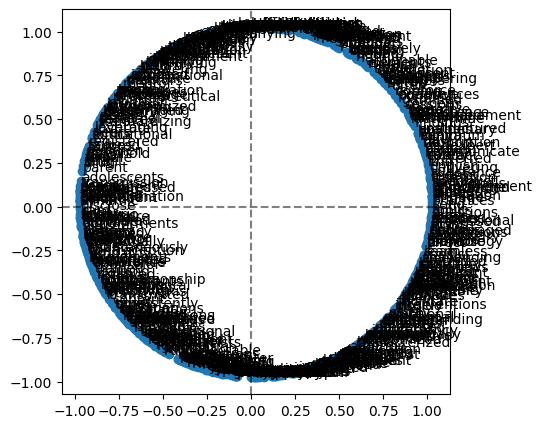

In [87]:
plt.figure(figsize=(5,5))
plt.scatter(transf_embeddings[:,0], transf_embeddings[:,1])
for idx,row in enumerate(transf_embeddings):
    plt.text(row[0], row[1], str(words_used[idx]))
plt.axvline(0, color='k', linestyle='--', alpha=0.5)
plt.axhline(0, color='k', linestyle='--', alpha=0.5)

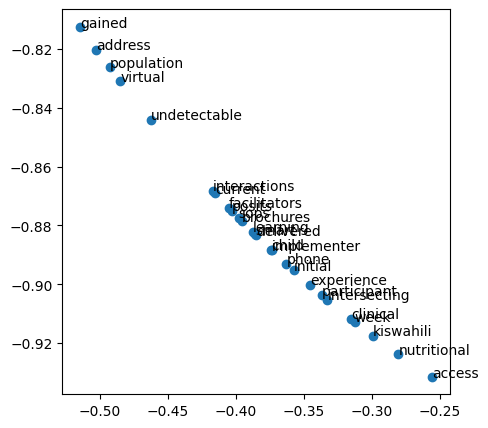

In [89]:
plt.figure(figsize=(5,5))

chosen_idxs = (transf_embeddings[:,0] < -.25) & (transf_embeddings[:,1] < -0.8)
transf_embeddings = transf_embeddings[chosen_idxs]
words_used = words_used[chosen_idxs]

plt.scatter(transf_embeddings[:,0], transf_embeddings[:,1])
for idx,row in enumerate(transf_embeddings):
    plt.text(row[0], row[1], str(words_used[idx]))